In [1]:
import xarray as xr
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('cm1_original/cm1out_20000101.000004.nc').isel(time=0)

u = ds['u']
v = ds['v']
w = ds['w']
dx = ds['xh']*units('m')
dy = ds['yh']*units('m')
dz = ds['zh']*units('m')

In [29]:
wind_speed = mpcalc.wind_speed(u.isel(nk=0), v.isel(nk=0))

In [35]:
wind_speed.max()

<xarray.DataArray ()>
<Quantity(114.90934753417969, 'meter / second')>
Coordinates:
    time     datetime64[ns] 2000-01-01T00:00:04

In [30]:
maximum = np.where(wind_speed==wind_speed.max())
maximum #y, x

(array([493]), array([1004]))

In [31]:
bound_x_right = maximum[1]+25
bound_x_left = maximum[1]-25
bound_y_top = maximum[0]+25
bound_y_bot = maximum[0]-25

In [32]:
bound_x_left, bound_x_right, bound_y_bot, bound_y_top # x x y y

(array([979]), array([1029]), array([468]), array([518]))

In [2]:
ds = xr.open_dataset('cm1_original/cm1out_20000101.000004.nc').isel(time=0)

ds = ds.isel(ni=slice(979,1029),nj=slice(468,518))

u = ds['u']
v = ds['v']
w = ds['w']
dx = ds['xh']*units('m')
dy = ds['yh']*units('m')
dz = ds['zh']*units('m')

wind_speed = mpcalc.wind_speed(u.isel(nk=0), v.isel(nk=0))

In [51]:
dudy = mpcalc.first_derivative(u.isel(nk=0), delta=dy[1]-dy[0])
dvdx = mpcalc.first_derivative(v.isel(nk=0), delta=dx[1]-dx[0])

In [52]:
vort = mpcalc.vorticity(u.isel(nk=0), v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0])

/tmp/ipykernel_3032403/3877703931.py:1: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  vort = mpcalc.vorticity(u.isel(nk=0), v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0])


In [53]:
vort

Magnitude,[[-0.36303460597991943 -0.3748661279678345 -0.29129981994628906 ... 0.19044417142868042 -0.04788398742675781 -0.2522757649421692] [-0.20501381158828735 -0.25541263818740845 -0.2760298252105713 ... 0.233514666557312 0.12325137853622437 -0.06507658958435059] [-0.00797206163406372 -0.06637877225875854 -0.13193601369857788 ... 0.11364191770553589 0.16666215658187866 0.10849344730377197] ... [0.06136387586593628 0.07219022512435913 0.06133580207824707 ... -0.020144283771514893 0.035350143909454346 0.09075784683227539] [0.1195111870765686 0.13447046279907227 0.12229037284851074 ... -0.05546218156814575 0.0319477915763855 0.12707030773162842] [0.14559853076934814 0.1441623568534851 0.1343199610710144 ... -0.09579718112945557 0.00119858980178833 0.12497198581695557]]
Units,1/second


In [55]:
 test = dvdx - dudy

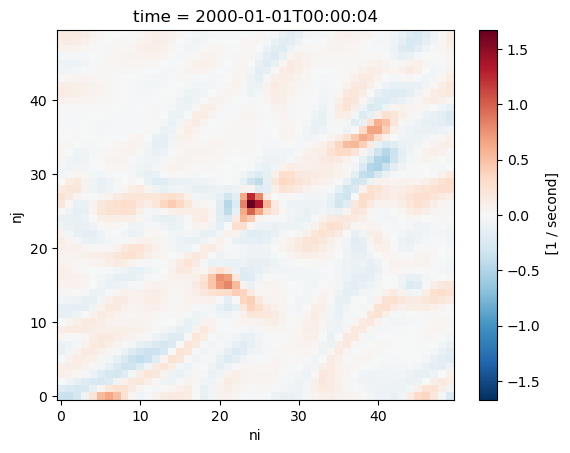

In [58]:
vort.plot()

In [63]:
test = xr.DataArray(test)

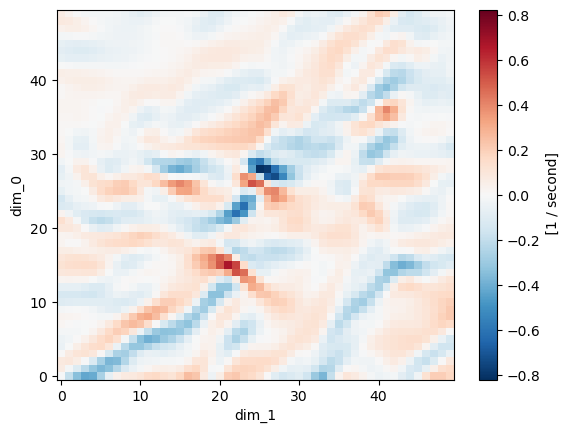

In [64]:
test.plot()

In [72]:
dvdx1 = mpcalc.vector_derivative(u=u.isel(nk=0), v=v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0], return_only = 'dv/dx')

/tmp/ipykernel_3032403/1538472017.py:1: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  dvdx1 = mpcalc.vector_derivative(u=u.isel(nk=0), v=v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0], return_only = 'dv/dx')


In [73]:
dudy1 = mpcalc.vector_derivative(u=u.isel(nk=0), v=v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0], return_only = 'du/dy')

/tmp/ipykernel_3032403/2864668205.py:1: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  dudy1 = mpcalc.vector_derivative(u=u.isel(nk=0), v=v.isel(nk=0), dx=dx[1]-dx[0], dy=dy[1]-dy[0], return_only = 'du/dy')


In [76]:
test1 = dvdx1 - dudy1

In [77]:
test1 = xr.DataArray(test1)

In [79]:
test1

Magnitude,[[-0.36303460597991943 -0.3748661279678345 -0.29129981994628906 ... 0.19044417142868042 -0.04788398742675781 -0.2522757649421692] [-0.20501381158828735 -0.25541263818740845 -0.2760298252105713 ... 0.233514666557312 0.12325137853622437 -0.06507658958435059] [-0.00797206163406372 -0.06637877225875854 -0.13193601369857788 ... 0.11364191770553589 0.16666215658187866 0.10849344730377197] ... [0.06136387586593628 0.07219022512435913 0.06133580207824707 ... -0.020144283771514893 0.035350143909454346 0.09075784683227539] [0.1195111870765686 0.13447046279907227 0.12229037284851074 ... -0.05546218156814575 0.0319477915763855 0.12707030773162842] [0.14559853076934814 0.1441623568534851 0.1343199610710144 ... -0.09579718112945557 0.00119858980178833 0.12497198581695557]]
Units,1/second


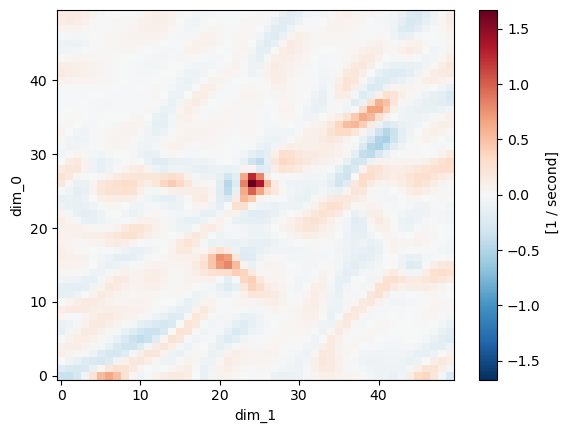

In [78]:
test1.plot()

In [80]:
# use mpcalc.vector_derivative!!!!!!!

In [81]:
# use mpcalc.geospatial_gradient for density and pressure gradients!!!!!!!